## **Cuándo Debes Normalizar los Datos**

  *   Cuando las variables tienen diferentes escalas: Si tienes variables con unidades o rangos muy diferentes (por ejemplo, ingreso en dólares y edad en años), la normalización ayuda a que todos los valores estén en una escala común.

  *   Cuando utilizas algoritmos sensibles a la escala: Algoritmos como las redes neuronales, el análisis de componentes principales (PCA), y K-means clustering se ven afectados por las diferencias de escala entre las variables. Estos algoritmos suelen beneficiarse de la normalización.
  
  *   Cuando usas distancias (por ejemplo, en K-NN): Los algoritmos basados en distancias, como K-NN, se ven muy afectados por la escala de las variables. Sin normalización, las variables con rangos más grandes dominarán la medida de distancia, lo que sesgaría el modelo. texto en negrita


## **Cuándo NO Debes Normalizar los Datos**

   

*   Cuando los datos ya están en una escala similar: Si todas las variables ya tienen un rango similar, como las variables de puntajes estandarizados (por ejemplo, puntajes Z), entonces no es necesario normalizar.



 *   Cuando las relaciones entre las variables son más importantes que las magnitudes absolutas: Si las relaciones entre las variables son más importantes para el análisis que los valores absolutos (como en algunos casos de análisis de regresión), entonces la normalización no siempre es necesaria.

*   Cuando estás utilizando árboles de decisión: Algoritmos basados en árboles de decisión (como Random Forest o XGBoost) no requieren normalización de los datos, ya que estos modelos no están influenciados por la escala de las variables. Los árboles de decisión se dividen según las características sin importar la magnitud de los valores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler



   Edad  Ingreso Mensual  Horas de Ejercicio
0    58             8215                   3
1    48             3454                   2
2    34             9996                   9
3    27             3731                   2
4    40             9154                   2


In [9]:
url = 'https://raw.githubusercontent.com/conectivaoficial/analisis-tech/refs/heads/main/normalizaci%C3%B3n.csv'
data=pd.read_csv(url, sep=",")
data.head()

,Edad,Ingreso Mensual,Horas de Ejercicio
0,58,8215,3
1,48,3454,2
2,34,9996,9
3,27,3731,2
4,40,9154,2


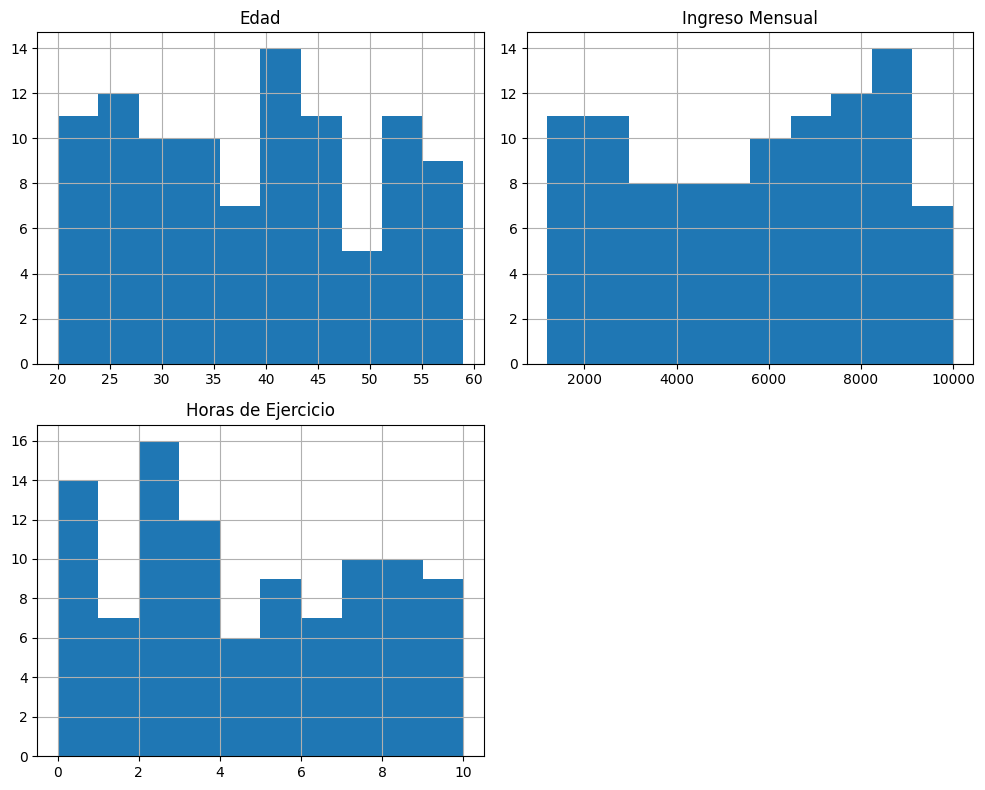

In [4]:
# Visualización de las distribuciones de las variables originales
data.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()


Min-Max Scaling: Los valores estarán restringidos al rango [0, 1]. Esto puede ser útil cuando trabajas con algoritmos que son sensibles al rango de los datos, como las redes neuronales o el análisis de componentes principales (PCA).

In [5]:
# Aplicar Min-Max Scaling
scaler_min_max = MinMaxScaler()

# Normalizamos las columnas
data_normalizada_min_max = data.copy()
data_normalizada_min_max[['Edad', 'Ingreso Mensual', 'Horas de Ejercicio']] = scaler_min_max.fit_transform(data[['Edad', 'Ingreso Mensual', 'Horas de Ejercicio']])

# Ver los primeros datos normalizados
print(data_normalizada_min_max.head())


       Edad  Ingreso Mensual  Horas de Ejercicio
0  0.974359         0.797591                 0.3
1  0.717949         0.256506                 0.2
2  0.358974         1.000000                 0.9
3  0.179487         0.287987                 0.2
4  0.512821         0.904307                 0.2


Z-Score Standardization: Los valores estarán distribuidos alrededor de 0, con una desviación estándar de 1. Esto es útil para algoritmos como la regresión logística o SVM, que asumen que los datos tienen una distribución normal y funcionan mejor con datos estandarizados.

In [6]:
# Aplicar Z-Score Standardization
scaler_standard = StandardScaler()

# Estandarizamos las columnas
data_estandarizada = data.copy()
data_estandarizada[['Edad', 'Ingreso Mensual', 'Horas de Ejercicio']] = scaler_standard.fit_transform(data[['Edad', 'Ingreso Mensual', 'Horas de Ejercicio']])

# Ver los primeros datos estandarizados
print(data_estandarizada.head())


       Edad  Ingreso Mensual  Horas de Ejercicio
0  1.670713         0.988160           -0.402100
1  0.801003        -0.880499           -0.729011
2 -0.416591         1.687190            1.559365
3 -1.025388        -0.771778           -0.729011
4  0.105235         1.356711           -0.729011


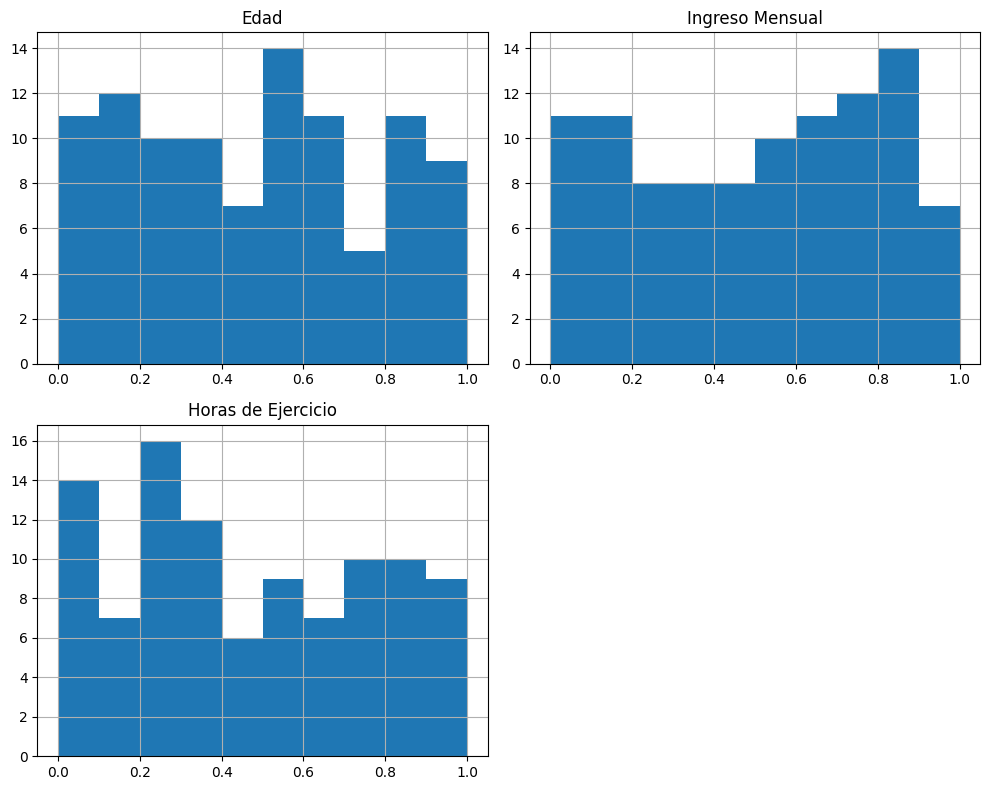

In [7]:
# Visualización de las distribuciones después de la normalización
data_normalizada_min_max.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()
